In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

Winch2_Filename_List = glob.glob('./WCH/*TWCH2.wch')
#print Winch2_Filename_List

df_list = []

for Winch2_Filename in Winch2_Filename_List:
    ds = xr.open_dataset(Winch2_Filename)
    
    df_list.append(ds.to_dataframe())
    
    ds.close()
    
df = pd.concat(df_list)

df.sort_index(inplace=True)

#df = df.resample('s')

df.index = np.round(df.index.astype(np.int64), -9).astype('datetime64[ns]')

df

,derivedWireout,wireout,derivedVelocity,maxTension,velocity,derivedTension,minTension,tension
time,,,,,,,,
2019-08-06 19:21:20,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:21,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:22,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:23,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:24,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:25,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:26,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:27,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165
2019-08-06 19:21:28,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165


(737288.0833333334, 737288.2916666666)

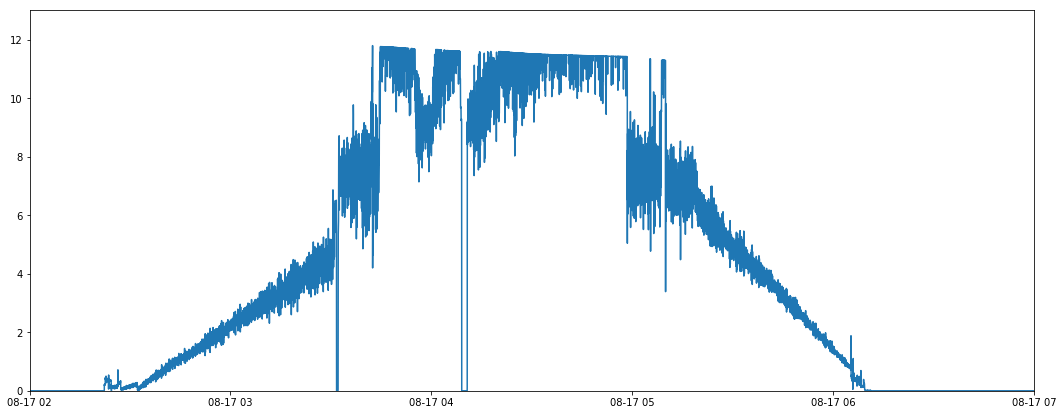

In [30]:
plt.figure(figsize=(18,7))
plt.plot(df['derivedTension'])
plt.ylim(0,13)

plt.xlim(pd.Timestamp('2019-08-17 02'), pd.Timestamp('2019-08-17 07'))


In [31]:
df_underway = pd.read_csv('../DAP/in2019_v04.uwy.csv')

df_underway.rename(columns={'datetime':'time'},inplace=True)
df_underway['time'] = pd.to_datetime(df_underway['time'])
df_underway.set_index('time',inplace=True)

df_underway = df_underway.resample('s').asfreq()

df_underway.interpolate(inplace=True)

#df_underway.rename(index={'datetime':'time'},inplace=True)

df_underway


,latitude,longitude,alt,speedOG,courseOG,shipHeading,depth,longitudinalWaterSpeed,transverseWaterSpeed,longitudinalGroundSpeed,...,fluorescence,labMainFlow,labBranchFlow,fluorometerFlow,fluorescenceVolts,fluorescenceConcentration,bPhase,optodeWaterTemp,do,doSaturation
time,,,,,,,,,,,,,,,,,,,,,
2019-08-06 19:21:25,-16.925717,145.780702,4.950,0.0000,216.490,190.580,NaN,NaN,NaN,NaN,...,1.72080,4.790,0.0,0.0,0.09,0.120,35.510,22.25,172.400,63.410
2019-08-06 19:21:26,-16.925717,145.780702,4.952,0.0000,203.364,190.580,NaN,NaN,NaN,NaN,...,1.71772,4.758,0.0,0.0,0.09,0.104,35.510,22.25,172.400,63.410
2019-08-06 19:21:27,-16.925717,145.780702,4.954,0.0000,190.238,190.580,NaN,NaN,NaN,NaN,...,1.71464,4.726,0.0,0.0,0.09,0.088,35.510,22.25,172.400,63.410
2019-08-06 19:21:28,-16.925717,145.780702,4.956,0.0000,177.112,190.580,NaN,NaN,NaN,NaN,...,1.71156,4.694,0.0,0.0,0.09,0.072,35.510,22.25,172.400,63.410
2019-08-06 19:21:29,-16.925717,145.780702,4.958,0.0000,163.986,190.580,NaN,NaN,NaN,NaN,...,1.70848,4.662,0.0,0.0,0.09,0.056,35.510,22.25,172.400,63.410
2019-08-06 19:21:30,-16.925717,145.780702,4.960,0.0000,150.860,190.580,NaN,NaN,NaN,NaN,...,1.70540,4.630,0.0,0.0,0.09,0.040,35.510,22.25,172.400,63.410
2019-08-06 19:21:31,-16.925717,145.780702,4.958,0.0000,152.934,190.578,NaN,NaN,NaN,NaN,...,1.70474,4.148,0.0,0.0,0.09,0.046,35.510,22.25,172.410,63.412
2019-08-06 19:21:32,-16.925717,145.780702,4.956,0.0000,155.008,190.576,NaN,NaN,NaN,NaN,...,1.70408,3.666,0.0,0.0,0.09,0.052,35.510,22.25,172.420,63.414
2019-08-06 19:21:33,-16.925717,145.780702,4.954,0.0000,157.082,190.574,NaN,NaN,NaN,NaN,...,1.70342,3.184,0.0,0.0,0.09,0.058,35.510,22.25,172.430,63.416


In [32]:
df_merge = df.merge(df_underway, on='time')

df_merge


,derivedWireout,wireout,derivedVelocity,maxTension,velocity,derivedTension,minTension,tension,latitude,longitude,...,fluorescence,labMainFlow,labBranchFlow,fluorometerFlow,fluorescenceVolts,fluorescenceConcentration,bPhase,optodeWaterTemp,do,doSaturation
time,,,,,,,,,,,,,,,,,,,,,
2019-08-06 19:21:25,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.72080,4.790,0.0,0.00,0.090000,0.120000,35.510,22.25,172.400,63.410
2019-08-06 19:21:26,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.71772,4.758,0.0,0.00,0.090000,0.104000,35.510,22.25,172.400,63.410
2019-08-06 19:21:27,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.71464,4.726,0.0,0.00,0.090000,0.088000,35.510,22.25,172.400,63.410
2019-08-06 19:21:28,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.71156,4.694,0.0,0.00,0.090000,0.072000,35.510,22.25,172.400,63.410
2019-08-06 19:21:29,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.70848,4.662,0.0,0.00,0.090000,0.056000,35.510,22.25,172.400,63.410
2019-08-06 19:21:30,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.70540,4.630,0.0,0.00,0.090000,0.040000,35.510,22.25,172.400,63.410
2019-08-06 19:21:31,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.70474,4.148,0.0,0.00,0.090000,0.046000,35.510,22.25,172.410,63.412
2019-08-06 19:21:32,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.70408,3.666,0.0,0.00,0.090000,0.052000,35.510,22.25,172.420,63.414
2019-08-06 19:21:33,4.400000,110.599998,0.0,0.165,0.0,0.000,0.165,0.165,-16.925717,145.780702,...,1.70342,3.184,0.0,0.00,0.090000,0.058000,35.510,22.25,172.430,63.416


(737288.0833333334, 737288.2916666666)

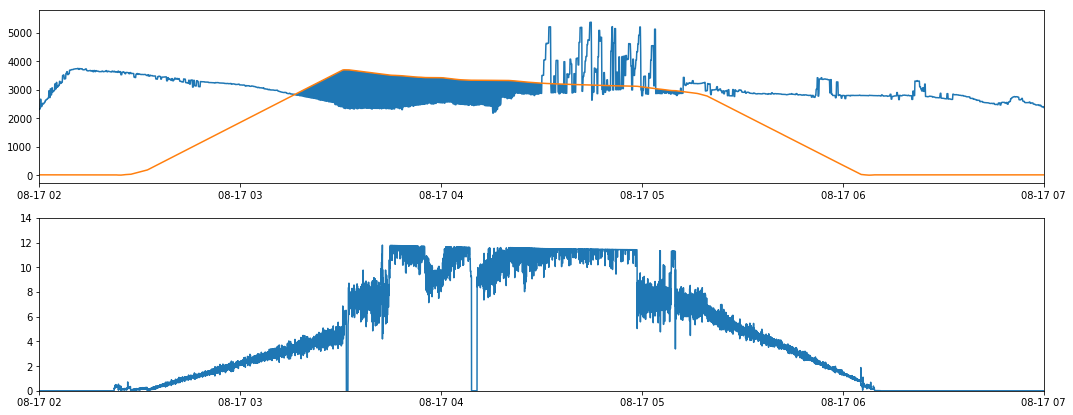

In [34]:
fill_area = np.array(df_merge.depth)
fill_area[fill_area<df_merge.derivedWireout] = df_merge.derivedWireout[fill_area<df_merge.derivedWireout]

plt.figure(figsize=(18,7))
plt.subplot(211)
plt.plot(df_merge.depth)
plt.plot(df_merge.derivedWireout)
plt.fill_between(df_merge.index,df_merge.depth,fill_area)
plt.xlim(pd.Timestamp('2019-08-17 02'), pd.Timestamp('2019-08-17 07'))

plt.subplot(212)
plt.plot(df_merge.derivedTension)
#plt.plot(df_merge.derivedWireout)
plt.ylim(0,14)
plt.xlim(pd.Timestamp('2019-08-17 02'), pd.Timestamp('2019-08-17 07'))


0.0 56.0


(737280.0, 737304.0)

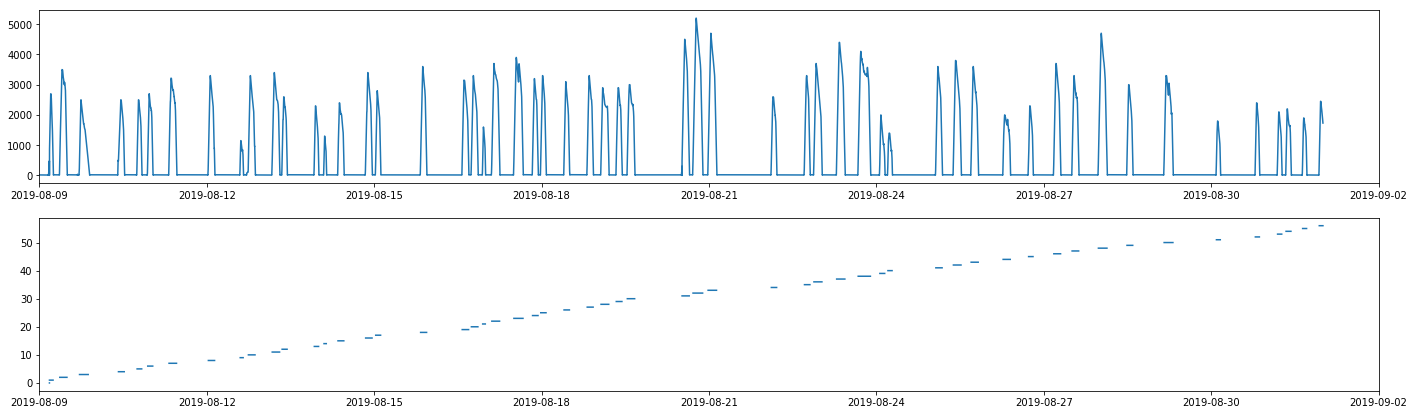

In [83]:
is_a_dredge = df_merge.derivedWireout>500

dredge_number = []
dredge_counter = -1
for i in is_a_dredge:
    if i:
        if len(dredge_number)>0:
            if np.isnan(dredge_number[-1]):
                dredge_counter+=1
        dredge_number.append(dredge_counter)
    else:
        dredge_number.append(np.nan)
        
print np.nanmin(dredge_number),np.nanmax(dredge_number)

df_merge['dredge_number'] = dredge_number
        
plt.figure(figsize=(24,7))
plt.subplot(211)
plt.plot(df_merge.derivedWireout)
plt.xlim(pd.Timestamp('2019-08-09'), pd.Timestamp('2019-09-2'))
plt.subplot(212)
plt.plot(df_merge.dredge_number)
plt.xlim(pd.Timestamp('2019-08-09'), pd.Timestamp('2019-09-2'))


In [85]:
Sacrificial_Length = 100.

for dredge in np.arange(1,np.nanmax(dredge_number),1):
    subset = df_merge[df_merge.dredge_number==dredge]
    
    
    fill_area = np.array(subset.depth)
    fill_area[fill_area<(subset.derivedWireout+Sacrificial_Length)] = subset.derivedWireout[fill_area<(subset.derivedWireout+Sacrificial_Length)]+Sacrificial_Length

    plt.figure(figsize=(14,7))
    plt.subplot(211)
    plt.plot(subset.depth)
    plt.plot(subset.derivedWireout,'--',alpha=0.6)
    plt.plot(subset.derivedWireout+Sacrificial_Length)
    plt.fill_between(subset.index,subset.depth,fill_area,alpha=0.5)
    plt.gca().invert_yaxis()
    plt.ylabel('Water Depth | Wire Out')
    #plt.xlim(subset.index[0]-pd.Timedelta('5 minutes'), subset.index[-1]+pd.Timedelta('30 minutes'))
    
    plt.title('in2018_v04 Dredge %d' % dredge)

    plt.subplot(212)
    plt.plot(subset.derivedTension)
    #plt.plot(df_merge.derivedWireout)
    plt.ylim(0,14)
    #plt.xlim(subset.index[0]-pd.Timedelta('5 minutes'), subset.index[-1]+pd.Timedelta('30 minutes'))
    plt.ylabel('Tension')
    plt.xlabel('UTC Time')
    
    plt.savefig('TensionPlot_Dredge_%d.pdf' % dredge)
    plt.close()
    